In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

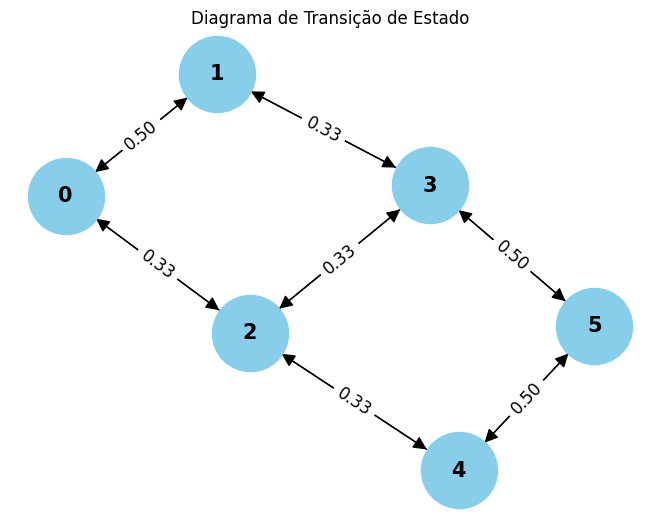

In [21]:


# Definir o grafo de transição
G = nx.DiGraph()

# Adicionar nós (salas)
for i in range(6):
    G.add_node(i)

# Adicionar arestas (transições entre salas) com probabilidades
edges = [
    (0, 1, 0.5), (0, 2, 0.5),
    (1, 0, 0.5), (1, 3, 0.5),
    (2, 0, 0.333), (2, 3, 0.333), (2, 4, 0.333),
    (3, 1, 0.333), (3, 2, 0.333), (3, 5, 0.333),
    (4, 2, 0.333), (4, 5, 0.333),
    (5, 3, 0.5), (5, 4, 0.5)
]

# Adicionar arestas ao grafo com rótulos de probabilidade
for (u, v, p) in edges:
    G.add_edge(u, v, weight=p)

# Desenhar o grafo
pos = nx.spring_layout(G)  # Posição dos nós
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{p:.2f}' for (u, v, p) in edges}, font_size=12)

# Mostrar o gráfico
plt.title('Diagrama de Transição de Estado')
plt.show()


In [14]:
# Matriz de transição P
P = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 0, 1/2, 0, 0],
    [1/3, 0, 0, 1/3, 1/3, 0],
    [0, 1/3, 1/3, 0, 0, 1/3],
    [0, 0, 1/3, 0, 0, 1/3],
    [0, 0, 0, 1/2, 1/2, 0]
])


In [15]:
# Elevar a matriz P à terceira potência
P3 = np.linalg.matrix_power(P, 3)

# Probabilidade do rato estar na sala 5 após 3 horas
prob_morrer_3h = P3[0, 5]
print(f"Probabilidade do rato estar na sala 5 após 3 horas: {prob_morrer_3h:.4f}")

Probabilidade do rato estar na sala 5 após 3 horas: 0.1944


In [16]:
# Submatriz Q correspondente aos estados transitórios
Q = np.array([
    [0, 1/2, 1/2, 0, 0],
    [1/2, 0, 0, 1/2, 0],
    [1/3, 0, 0, 1/3, 1/3],
    [0, 1/3, 1/3, 0, 0],
    [0, 0, 1/3, 0, 0]
])

# Identidade
I = np.eye(Q.shape[0])

# Calcular (I - Q)^{-1}
N = np.linalg.inv(I - Q)

# Tempo médio de absorção
t = N @ np.ones(Q.shape[0])
print(f"Número médio de passos até a absorção a partir da sala 0: {t[0]:.4f}")


Número médio de passos até a absorção a partir da sala 0: 8.8462
